### Delivery Time => Predict delivery Time using sorting time, Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
time=pd.read_csv("delivery_time.csv")
time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
# Rename the Dataset
data=time.rename({'Delivery Time':'delivery', 'Sorting Time':'sorting'},axis=1)
data

,delivery,sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA and Data Visualization

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   delivery  21 non-null     float64
 1   sorting   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 504.0 bytes


<AxesSubplot:xlabel='delivery', ylabel='Density'>

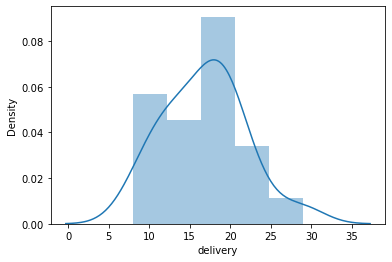

In [7]:
sns.distplot(data['delivery'])

<AxesSubplot:xlabel='sorting', ylabel='Density'>

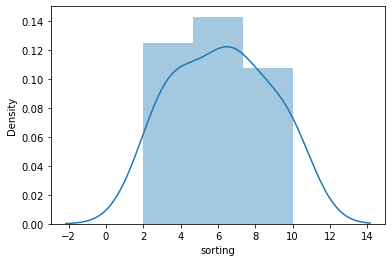

In [8]:
sns.distplot(data['sorting'])

## Correlation Analysis

In [9]:
data.corr()

,delivery,sorting
delivery,1.000000,0.825997
sorting,0.825997,1.000000


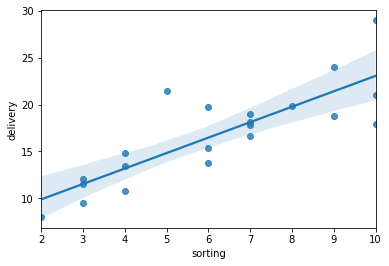

In [10]:
sns.regplot(x=data['sorting'],y=data['delivery']);

## Model Building

In [11]:
model=smf.ols('delivery~sorting',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           3.98e-06
Time:                        10:21:31   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#Coefficients
model.params

Intercept    6.582734
sorting      1.649020
dtype: float64

In [13]:
#t and p-values
print(model.tvalues, '\n',model.pvalues)

Intercept    3.823349
sorting      6.387447
dtype: float64 
 Intercept    0.001147
sorting      0.000004
dtype: float64


In [14]:
#R-squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

## Predict for new data

In [15]:
# Manual pradiction for sorting time 6
delivery= (6.582734) + (1.649020)*(6)
delivery

16.476854

In [16]:
# Automatic Prediction for sorting time 6, 8
new_data=pd.Series([6,8])
new_data

0    6
1    8
dtype: int64

In [22]:
pred=pd.DataFrame(new_data,columns=['sorting'])
pred

,sorting
0,6
1,8


In [23]:
model.predict(pred)

0    16.476853
1    19.774893
dtype: float64

ERROR! Session/line number was not unique in database. History logging moved to new session 157


In [25]:
# Prediction of the data
data['Predicted']=model.fittedvalues
data

,delivery,sorting,Predicted
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913
